## Problem 1 (MATLAB neural network toolbox)

In [182]:
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.io as sio
from numpy import linalg as la
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets

In [40]:
x = torch.unsqueeze(torch.arange(0, 2, 0.01), dim=1)

y = torch.sin(2*math.pi*x) + 0.1 * torch.rand(x.size())

In [205]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input, 3 hidden, 1 output 
        # kernel
        self.input = nn.Linear(1,3)
        self.hidden = nn.Linear(3,3)
        self.output = nn.Linear(3,1)
        self.tan = nn.Tanh()
        
    def forward(self, X):
        X = self.tan(self.input(X))
        X = self.tan(self.hidden(X))
        X = self.output(X)
        return X

In [206]:
model = Net()
print(model)

Net(
  (input): Linear(in_features=1, out_features=3, bias=True)
  (hidden): Linear(in_features=3, out_features=3, bias=True)
  (output): Linear(in_features=3, out_features=1, bias=True)
  (tan): Tanh()
)


In [207]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
loss_func = torch.nn.MSELoss()

Epoch  0 :  tensor(0.5084)
Epoch  20 :  tensor(0.4234)
Epoch  40 :  tensor(0.4099)
Epoch  60 :  tensor(0.4019)
Epoch  80 :  tensor(0.3820)
Epoch  100 :  tensor(0.3357)
Epoch  120 :  tensor(0.3013)
Epoch  140 :  tensor(0.2808)
Epoch  160 :  tensor(0.2709)
Epoch  180 :  tensor(0.0918)
Epoch  200 :  tensor(0.0292)
Epoch  220 :  tensor(0.0214)
Epoch  240 :  tensor(0.0198)
Epoch  260 :  tensor(0.0186)
Epoch  280 :  tensor(0.0176)
Epoch  300 :  tensor(0.0167)
Epoch  320 :  tensor(0.0159)
Epoch  340 :  tensor(0.0148)
Epoch  360 :  tensor(0.0148)
Epoch  380 :  tensor(0.0126)
Epoch  400 :  tensor(0.0113)
Epoch  420 :  tensor(0.0100)
Epoch  440 :  tensor(0.0088)
Epoch  460 :  tensor(0.0078)
Epoch  480 :  tensor(0.0089)
Epoch  500 :  tensor(0.0063)
Epoch  520 :  tensor(0.0055)
Epoch  540 :  tensor(0.0048)
Epoch  560 :  tensor(0.0043)
Epoch  580 :  tensor(0.0079)
Epoch  600 :  tensor(0.0039)
Epoch  620 :  tensor(0.0032)
Epoch  640 :  tensor(0.0028)
Epoch  660 :  tensor(0.0025)
Epoch  680 :  tensor

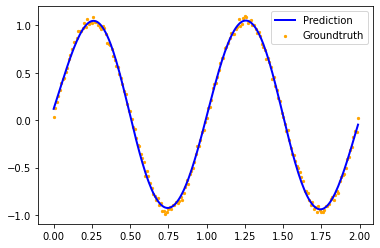

In [208]:
for t in range(2001):
    
    # Make predictions for this batch
    y_predicted = model(x)
    # Compute the loss and its gradients
    loss = loss_func(y_predicted, y) 
    
    if t%20 == 0:
        print('Epoch ',t,': ', loss.data)
    if loss < 0.001:
        print(f'Early stop at {t} epochs with loss less than 0.001.')
        break
    
    # Zero your gradients for every batch!
    optimizer.zero_grad()
    
    loss.backward()
    
    # Adjust learning weights
    optimizer.step()

#sqrt(mean());
print('root-mean-squared error = ', math.sqrt(np.mean(((y_predicted-y)**2).detach().numpy())))
plt.clf()
plt.plot(x.numpy(), y_predicted.data.numpy(), '-', c='blue', lw=2, label='Prediction')
plt.scatter(x.numpy(), y.data.numpy(), c='orange', s=5, label='Groundtruth')
plt.legend()
plt.show()

經過測試，在Neurons數量為3時，他有時候能在epochs小於2000收斂，但在大部分的時候並沒有辦法於epochs2000收斂，而此次結果於epochs=1241時收斂，且root-mean-squared error為0.03161905342197004

## Problem 2 (Convolutional neural network)

In [308]:
# data = sio.loadmat("07HW2_digit.mat", mdict=None, appendmat=True)


# Trlabel = ['train0','train1','train2','train3','train4','train5','train6','train7','train8','train9']
# Tlabel = ['test0','test1','test2','test3','test4','test5','test6','test7','test8','test9']
# Train = []
# Test = []

# for t in Trlabel:
#     Train.append(data.get(t).astype(float))

# for t in Tlabel:
#     Test.append(data.get(t).astype(float))
# Train = np.array(Train)
# Train_label = np.repeat(range(10), Train.shape[1])
# Test = np.array(Test)
# Test_label = np.repeat(range(10), Test.shape[1])
# #plt.imshow(Train[0,0].reshape(28,28), cmap='gray')
# print(Train.shape, Train_label.shape)
# print(Test.shape, Test_label.shape)

In [337]:
trainset = datasets.MNIST('', train=True, download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))
testset = datasets.MNIST('', train=False, download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))
print(len(trainset), len(testset))

60000 10000


In [338]:
# Hyper Parameters
# batch_size, epoch and iteration
LR = 0.01
bsize = 100
n_iters = 10000
num_epochs = int(n_iters / (len(trainset) / bsize))
print(f'number of epochs = {num_epochs}')

number of epochs = 16


In [339]:
# 28*28 feature map
trainloader = torch.utils.data.DataLoader(trainset, batch_size=bsize, shuffle=True, pin_memory=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=bsize, shuffle=True, pin_memory=True)

In [340]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolution 1 , input_shape=(1,28,28)
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0) #output_shape=(16,24,24)
        self.relu1 = nn.ReLU() # activation
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2) #output_shape=(16,12,12)
        
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0) #output_shape=(32,8,8)
        self.relu2 = nn.ReLU() # activation
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2) #output_shape=(32,4,4)
        
        # Fully connected 1 ,#input_shape=(32*4*4)
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
        
        
    def forward(self, x):
        # Convolution 1
        x = self.cnn1(x)
        x = self.relu1(x)
        
        # Max pool 1
        x = self.maxpool1(x)
        
        # Convolution 2 
        x = self.cnn2(x)
        x = self.relu2(x)
        
        # Max pool 2 
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        
        # Linear function (readout)
        x = self.fc1(x)
  
        return x

In [341]:
# 整個算loss過程使用 log_softmax + nll_loss，其實就是 CrossEntropyLoss
      
model = Net() # inital network

optimizer = torch.optim.Adam(model.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted


In [342]:
model.train()

training_loss = []
training_accuracy = []
validation_loss = []
validation_accuracy = []
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader):
        X, y = data
        # training process
        optimizer.zero_grad()    # clear the gradient calculated previously
        y_predicted = model(X)  # put the mini-batch training data to Nerual Network, and get the predicted labels
        loss = loss_func(y_predicted, y)  # compare the predicted labels with ground-truth labels
        loss.backward()      # compute the gradient
        optimizer.step()     # optimize the network
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %3d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
        correct_train += (torch.argmax(y_predicted, dim=1) == y).sum().item()
        total_train += y.size(0)
    
    train_accuracy = 100 * correct_train / float(total_train)
    training_accuracy.append(train_accuracy)
    training_loss.append(loss.data)
    
    
    # Evaluation the testing data
    correct_test = 0
    total_test = 0
    for data in testloader:
        X, y = data
        y_predicted = model(X)
        val_loss = loss_func(y_predicted, y)
        correct_test += (torch.argmax(y_predicted, dim=1) == y).sum().item()
        total_test += y.size(0)
    
    val_accuracy = 100 * correct_test / float(total_test)
    validation_accuracy.append(val_accuracy)
    validation_loss.append(val_loss.data)
    
print(f'Training data Accuracy = {round(correct_train/total_train, 3)}')
print(f'testing data Accuracy = {round(correct_test/total_test, 3)}')

[1, 100] loss: 0.378
[1, 200] loss: 0.122
[1, 300] loss: 0.087
[1, 400] loss: 0.072
[1, 500] loss: 0.056
[1, 600] loss: 0.065
[2, 100] loss: 0.051
[2, 200] loss: 0.061
[2, 300] loss: 0.055
[2, 400] loss: 0.055
[2, 500] loss: 0.049
[2, 600] loss: 0.057
[3, 100] loss: 0.042
[3, 200] loss: 0.042
[3, 300] loss: 0.044
[3, 400] loss: 0.049
[3, 500] loss: 0.045
[3, 600] loss: 0.051
[4, 100] loss: 0.044
[4, 200] loss: 0.039
[4, 300] loss: 0.041
[4, 400] loss: 0.051
[4, 500] loss: 0.048
[4, 600] loss: 0.048
[5, 100] loss: 0.031
[5, 200] loss: 0.040
[5, 300] loss: 0.039
[5, 400] loss: 0.050
[5, 500] loss: 0.038
[5, 600] loss: 0.050
[6, 100] loss: 0.031
[6, 200] loss: 0.037
[6, 300] loss: 0.034
[6, 400] loss: 0.037
[6, 500] loss: 0.043
[6, 600] loss: 0.044
[7, 100] loss: 0.020
[7, 200] loss: 0.034
[7, 300] loss: 0.033
[7, 400] loss: 0.045
[7, 500] loss: 0.038
[7, 600] loss: 0.048
[8, 100] loss: 0.040
[8, 200] loss: 0.029
[8, 300] loss: 0.039
[8, 400] loss: 0.042
[8, 500] loss: 0.034
[8, 600] loss

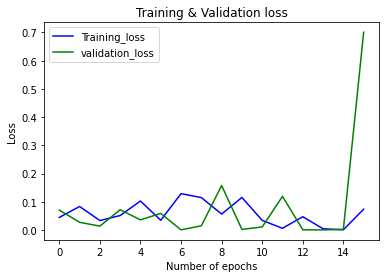

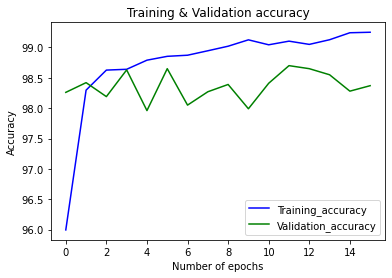

In [343]:
# visualization
plt.plot(range(num_epochs), training_loss, 'b-', label='Training_loss')
plt.plot(range(num_epochs), validation_loss, 'g-', label='validation_loss')
plt.title('Training & Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(num_epochs), training_accuracy, 'b-', label='Training_accuracy')
plt.plot(range(num_epochs), validation_accuracy, 'g-', label='Validation_accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

我使用MINIST資料集，當中hyperparameters, learning rate為0.01, batch size為100, number of epochs為16